In [1]:
import astropy.units as u
import matplotlib.pyplot as plt

import pint.fitter
from pint.models import get_model_and_toas
from pint.residuals import Residuals
import pint.logging

pint.logging.setup(level="INFO")

1

In [2]:
parfile= "J2124-3358_mod.par"
timfile= "J2124-3358_mod.tim"

m, t_all = get_model_and_toas(parfile, timfile)
m.find_empty_masks(t_all, freeze=True)

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\timing_model.py:392 UserWarning: PINT does not support 'DILATEFREQ Y'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\timing_model.py:395 UserWarning: PINT only supports 'TIMEEPH FB90'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'EPHVER 5'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\pint\models\model_builder.py:198 UserWarning: Unrecognized parfile line 'DM_SERIES TAYLOR'
WARNING  (pint.models.model_builder     ): UNITS is not specified. Assuming TDB...
INFO     (pint.observatory              ): Applying GPS to UTC clock correction (~few nanoseconds)
INFO     (pint.observatory              ): Loading global GPS clock file
INFO     (pint.observatory              ): Using global clock file for gps2utc.clk with bogus_last_correction=

['JUMP1',
 'JUMP2',
 'JUMP3',
 'JUMP4',
 'JUMP5',
 'JUMP6',
 'JUMP7',
 'JUMP8',
 'JUMP9',
 'JUMP10',
 'JUMP11',
 'JUMP12',
 'JUMP13',
 'JUMP14',
 'JUMP15',
 'JUMP16',
 'JUMP38',
 'JUMP39',
 'JUMP40',
 'JUMP41',
 'JUMP43',
 'JUMP44',
 'JUMP45']

INFO     (pint.models.timing_model      ): 'JUMP15' has no TOAs so freezing
INFO     (pint.models.timing_model      ): 'JUMP16' has no TOAs so freezing
INFO     (pint.models.timing_model      ): 'JUMP38' has no TOAs so freezing


INFO     (pint.models.timing_model      ): 'JUMP39' has no TOAs so freezing
INFO     (pint.models.timing_model      ): 'JUMP40' has no TOAs so freezing
INFO     (pint.models.timing_model      ): 'JUMP41' has no TOAs so freezing
INFO     (pint.models.timing_model      ): 'JUMP43' has no TOAs so freezing
INFO     (pint.models.timing_model      ): 'JUMP44' has no TOAs so freezing
INFO     (pint.models.timing_model      ): 'JUMP45' has no TOAs so freezing
INFO     (pint.observatory              ): Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
INFO     (pint.observatory              ): Loading BIPM clock version bipm2021
INFO     (pint.observatory              ): Using global clock file for tai2tt_bipm2021.clk with bogus_last_correction=False


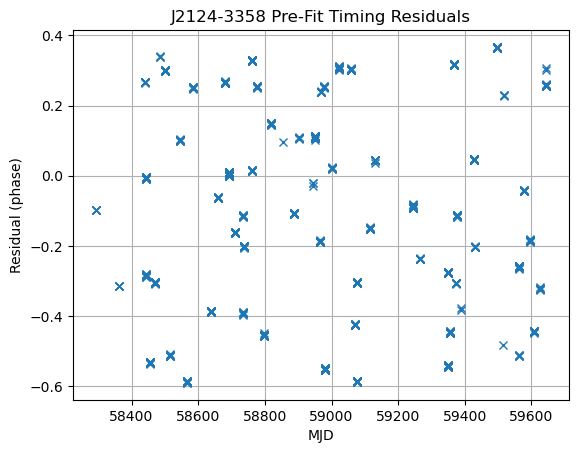

In [3]:
rs = Residuals(t_all, m).phase_resids
xt = t_all.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [4]:
t_all.print_summary()

Number of TOAs:  1083
Number of commands:  2
Number of observatories: 1 ['parkes']
MJD span:  58291.887 to 59645.158
Date span: 2018-06-22 21:17:43.299044790 to 2022-03-07 03:47:27.428173140
parkes TOAs (1083):
  Min freq:      708.559 MHz
  Max freq:      3132.164 MHz
  Min error:     0.469 us
  Max error:     12.3 us
  Median error:  4.5 us



In [8]:
error_ok = t_all.table["error"] <= 5 * u.us
t = t_all[error_ok]
t.print_summary()



Number of TOAs:  602
Number of commands:  2
Number of observatories: 1 ['parkes']
MJD span:  58362.622 to 59645.158
Date span: 2018-09-01 14:55:38.336849573 to 2022-03-07 03:47:27.428173140
parkes TOAs (602):
  Min freq:      708.559 MHz
  Max freq:      2797.108 MHz
  Min error:     0.469 us
  Max error:     5 us
  Median error:  2.97 us



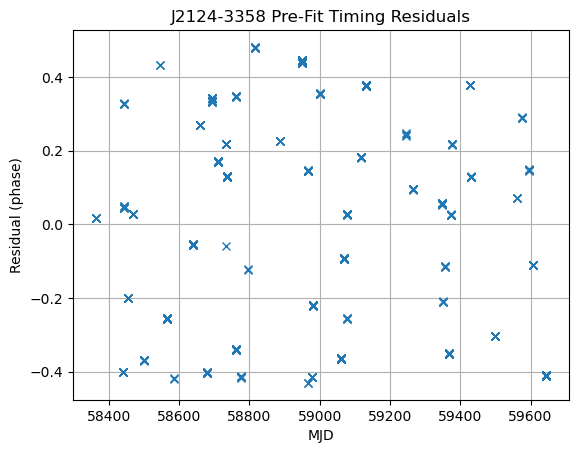

In [9]:
rs = Residuals(t, m).phase_resids
xt = t.get_mjds()
plt.figure()
plt.plot(xt, rs, "x")
plt.title(f"{m.PSR.value} Pre-Fit Timing Residuals")
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

In [10]:

f = pint.fitter.Fitter.auto(t, m)
f.fit_toas()

INFO     (pint.fitter                   ): For narrowband TOAs without correlated errors and downhill fitter, returning 'DownhillWLSFitter'
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\erfa\core.py:154 ErfaWarning: ERFA function "pmsafe" yielded 602 of "distance overridden (Note 6)"
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\erfa\core.py:154 ErfaWarning: ERFA function "pmsafe" yielded 1 of "distance overridden (Note 6)"
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\erfa\core.py:154 ErfaWarning: ERFA function "pmsafe" yielded 602 of "distance overridden (Note 6)"
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\erfa\core.py:154 ErfaWarning: ERFA function "pmsafe" yielded 602 of "distance overridden (Note 6)"
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\erfa\core.py:154 ErfaWarning: ERFA function "pmsafe" yielded 602 of "distance overridden (N

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\erfa\core.py:154 ErfaWarning: ERFA function "pmsafe" yielded 602 of "distance overridden (Note 6)"
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\erfa\core.py:154 ErfaWarning: ERFA function "pmsafe" yielded 602 of "distance overridden (Note 6)"
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\erfa\core.py:154 ErfaWarning: ERFA function "pmsafe" yielded 602 of "distance overridden (Note 6)"
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\erfa\core.py:154 ErfaWarning: ERFA function "pmsafe" yielded 602 of "distance overridden (Note 6)"
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\erfa\core.py:154 ErfaWarning: ERFA function "pmsafe" yielded 602 of "distance overridden (Note 6)"
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\erfa\core.py:154 ErfaWarning: ERFA function "pmsafe" yi

WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\erfa\core.py:154 ErfaWarning: ERFA function "pmsafe" yielded 602 of "distance overridden (Note 6)"
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\erfa\core.py:154 ErfaWarning: ERFA function "pmsafe" yielded 602 of "distance overridden (Note 6)"
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\erfa\core.py:154 ErfaWarning: ERFA function "pmsafe" yielded 1 of "distance overridden (Note 6)"
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\erfa\core.py:154 ErfaWarning: ERFA function "pmsafe" yielded 602 of "distance overridden (Note 6)"
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\erfa\core.py:154 ErfaWarning: ERFA function "pmsafe" yielded 1 of "distance overridden (Note 6)"
WARNING  (pint.logging                  ): D:\miniconda3\Lib\site-packages\erfa\core.py:154 ErfaWarning: ERFA function "pmsafe" yielde

MaxiterReached: Convergence not detected after 10 steps.

In [11]:
f.print_summary()

Fitted model using downhill_wls method with 16 free parameters to 602 TOAs
Prefit residuals Wrms = 1602.9610225074152 us, Postfit residuals Wrms = 717.270982063741 us
Chisq = 82250181.848 for 585 d.o.f. for reduced Chisq of 140598.601

PAR                        Prefit                  Postfit            Units
=================== ==================== ============================ =====
PSR                           J2124-3358 J2124-3358                   None
EPHEM                              DE436 DE436                        None
CLOCK                       TT(BIPM2020) TT(BIPM2020)                 None
UNITS                                TDB TDB                          None
START                            58291.9                      58362.6 d 
FINISH                           59645.2                      59645.2 d 
TIMEEPH                             FB90 FB90                         None
T2CMETHOD                       IAU2000B IAU2000B                     None
DILATEFREQ      